In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pingouin as pg
from Images import plots


In [2]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

In [5]:
scores = []
mls  = ['SVM', 'XGBoost', 'Random_Forest', 'FCNN', 'FCNN_separated', 'MPNN', 'MPNN_separated', '1NN', '5NN']
abbs = ['svm', 'xgb', 'rf', 'fcnn', 'fcnn_sep', 'mpnn', 'mpnn_sep', '1NN', '5NN']

for i, split in enumerate(['wodirection_trtssplit', 'axv']):
    for ml, abb in zip(mls, abbs):
        
        if i==0:
            df = pd.read_csv('./Score_%s/%s/mean.tsv'%(split, ml), sep='\t', index_col=0)
        if i==1:
            df = pd.read_csv('./Score_%s/%s/mean_bothout.tsv'%(split, ml), sep='\t', index_col=0)
            
        df = assign_vals(df, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
        df['model'] = abb
        df['split'] = split
        
        scores += [df]



In [6]:
all_scores = pd.concat(scores, ignore_index=True)

/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


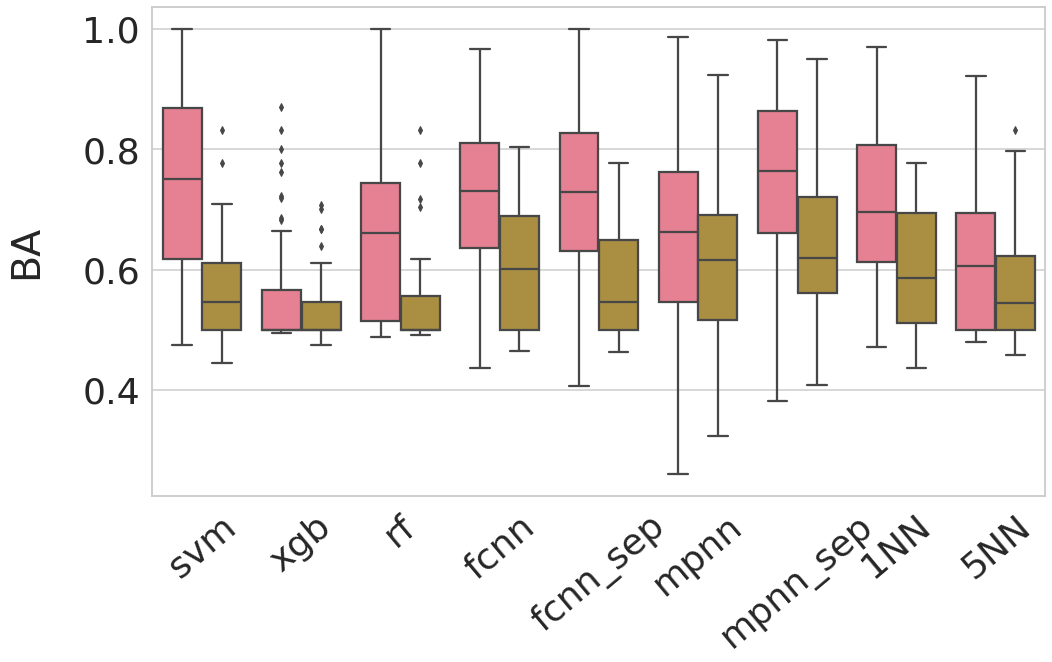

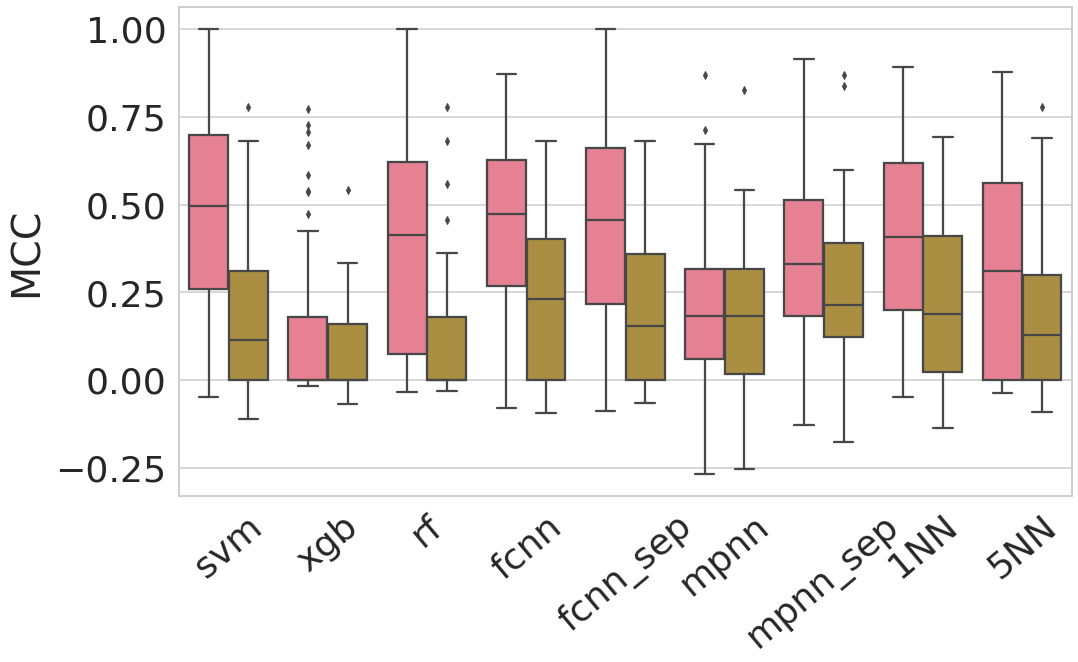

In [7]:
for metric, ylabel, pad in zip(['balanced_accuracy', 'matthews_coeff'], ['BA', 'MCC'], [37, 10]):
    ax = plots.MakeBoxPlotsSeaborn(table     = all_scores,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'split',
                            use_swarm = False,
                            rotate_x  = True,
                            show_legend = False,
                            context   = 'talk',
                           font_scale= 2.2,
                           font      = 'Segoe UI',
                           fsize      = (16,9)
                            )

    ax.yaxis.labelpad = pad
    ax.set(ylabel=ylabel, xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center')